In [56]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)

from sklearn import linear_model, cross_validation

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [96]:
df = pd.read_csv(os.path.join('titanic-train.csv'))

In [43]:
df

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId
0,1302,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C,1302
1,17,0,3,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5000,S,17
2,1049,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,S,1049
3,388,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,S,388
4,1060,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,S,1060
5,328,0,2,"Stanton, Mr. Samuel Ward",male,41.0,0,0,237734,15.0458,C,328
...,...,...,...,...,...,...,...,...,...,...,...,...
867,135,0,2,"Giles, Mr. Ralph",male,24.0,0,0,248726,13.5000,S,135
868,382,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,Q,382
869,529,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,S,529


In [5]:
df_test = pd.read_csv(os.path.join('titanic-test.csv'))

In [11]:
df.Embarked.unique()

array(['C', 'S', 'Q', nan], dtype=object)

In [9]:
df.isnull().sum()

Unnamed: 0       0
Survived         0
Pclass           0
Name             0
Sex              0
Age            172
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
PassengerId      0
dtype: int64

In [12]:
df.corr()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,PassengerId
Unnamed: 0,1.000000,0.006311,0.025241,0.020005,0.001659,0.019943,-0.028013,1.000000
Survived,0.006311,1.000000,-0.338951,-0.034977,-0.012812,0.107791,0.257220,0.006311
Pclass,0.025241,-0.338951,1.000000,-0.377474,0.064589,0.000924,-0.557365,0.025241
Age,0.020005,-0.034977,-0.377474,1.000000,-0.262496,-0.161495,0.139542,0.020005
SibSp,0.001659,-0.012812,0.064589,-0.262496,1.000000,0.358425,0.136756,0.001659
Parch,0.019943,0.107791,0.000924,-0.161495,0.358425,1.000000,0.189630,0.019943
Fare,-0.028013,0.257220,-0.557365,0.139542,0.136756,0.189630,1.000000,-0.028013
PassengerId,1.000000,0.006311,0.025241,0.020005,0.001659,0.019943,-0.028013,1.000000


In [97]:
df = df.drop('Unnamed: 0', axis = 1)

In [14]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId
0,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C,1302
1,0,3,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5000,S,17
2,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,S,1049
3,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,S,388
4,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,S,1060
5,0,2,"Stanton, Mr. Samuel Ward",male,41.0,0,0,237734,15.0458,C,328
...,...,...,...,...,...,...,...,...,...,...,...
867,0,2,"Giles, Mr. Ralph",male,24.0,0,0,248726,13.5000,S,135
868,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,Q,382
869,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,S,529


In [15]:
df.Pclass.value_counts()

3    476
1    214
2    183
Name: Pclass, dtype: int64

In [98]:
pclass_df = pd.get_dummies(df.Pclass, prefix = 'Pclass')
embk_df = pd.get_dummies(df.Embarked, prefix = 'Embk')
df = df.join([pclass_df, embk_df])

In [46]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,...,Pclass_1,Pclass_2,Pclass_3,Embk_C,Embk_Q,Embk_S
0,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,...,1,0,0,1,0,0
1,0,3,"van Billiard, Master. Walter John",male,11.5,1,...,0,0,1,0,0,1
2,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,...,1,0,0,0,0,1
3,1,3,"Stranden, Mr. Juho",male,31.0,0,...,0,0,1,0,0,1
4,1,2,"Davis, Miss. Mary",female,28.0,0,...,0,1,0,0,0,1
5,0,2,"Stanton, Mr. Samuel Ward",male,41.0,0,...,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,0,2,"Giles, Mr. Ralph",male,24.0,0,...,0,1,0,0,0,1
868,0,3,"Rice, Master. George Hugh",male,8.0,4,...,0,0,1,0,1,0
869,0,1,"Smart, Mr. John Montgomery",male,56.0,0,...,1,0,0,0,0,1


In [18]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,...,Par_5,Par_6,Par_9,Embk_C,Embk_Q,Embk_S
Survived,1.000000,-0.338951,-0.034977,-0.012812,0.107791,0.257220,...,-0.038549,-0.038549,-0.027243,0.144005,-0.030919,-0.112497
Pclass,-0.338951,1.000000,-0.377474,0.064589,0.000924,-0.557365,...,0.040076,0.040076,0.028322,-0.270560,0.225001,0.100929
Age,-0.034977,-0.377474,1.000000,-0.262496,-0.161495,0.139542,...,0.035443,0.044830,NaN,0.065213,0.006876,-0.073141
SibSp,-0.012812,0.064589,-0.262496,1.000000,0.358425,0.136756,...,0.001562,0.027284,0.019281,-0.048785,-0.021368,0.058846
Parch,0.107791,0.000924,-0.161495,0.358425,1.000000,0.189630,...,0.265933,0.323584,0.350903,-0.005521,-0.091964,0.065851
Fare,0.257220,-0.557365,0.139542,0.136756,0.189630,1.000000,...,-0.002059,0.013794,0.024944,0.275256,-0.116319,-0.171316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Par_5,-0.038549,0.040076,0.035443,0.001562,0.265933,-0.002059,...,1.000000,-0.002296,-0.001623,-0.023736,0.067257,-0.021909
Par_6,-0.038549,0.040076,0.044830,0.027284,0.323584,0.013794,...,-0.002296,1.000000,-0.001623,-0.023736,-0.015324,0.030781
Par_9,-0.027243,0.028322,NaN,0.019281,0.350903,0.024944,...,-0.001623,-0.001623,1.000000,-0.016774,-0.010830,0.021753


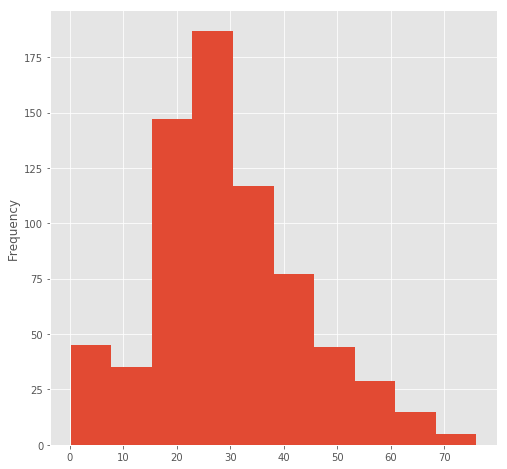

In [19]:
df.Age.plot(kind = 'hist', figsize = (8, 8))

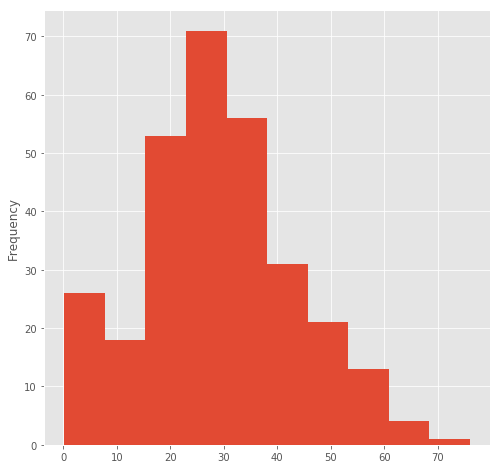

In [20]:
df.Age[df.Survived==1].plot(kind = 'hist', figsize = (8, 8))

In [26]:
df.Age[ df.Age >= 18].mean()

33.26391231028668

In [47]:
df.corr().Survived.sort_values(ascending = False).head(10)

Survived       1.000000
Pclass_1       0.299439
Fare           0.257220
Embk_C         0.144005
Parch          0.107791
Pclass_2       0.063957
PassengerId    0.006311
SibSp         -0.012812
Embk_Q        -0.030919
Age           -0.034977
Name: Survived, dtype: float64

In [35]:
df.Pclass.value_counts()

3    476
1    214
2    183
Name: Pclass, dtype: int64

In [38]:
df.SibSp.value_counts()

0    596
1    214
2     28
4     16
3     14
8      3
5      2
Name: SibSp, dtype: int64

In [40]:
df.Parch.value_counts()

0    659
1    122
2     79
3      5
4      3
6      2
5      2
9      1
Name: Parch, dtype: int64

In [41]:
df.Embarked.value_counts()

S    618
C    172
Q     81
Name: Embarked, dtype: int64

In [99]:
df.Sex = df.Sex.apply(lambda value: 0 if value == 'female' else 1)

In [49]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,...,Pclass_1,Pclass_2,Pclass_3,Embk_C,Embk_Q,Embk_S
0,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",0,23.0,0,...,1,0,0,1,0,0
1,0,3,"van Billiard, Master. Walter John",1,11.5,1,...,0,0,1,0,0,1
2,1,1,"Frauenthal, Dr. Henry William",1,50.0,2,...,1,0,0,0,0,1
3,1,3,"Stranden, Mr. Juho",1,31.0,0,...,0,0,1,0,0,1
4,1,2,"Davis, Miss. Mary",0,28.0,0,...,0,1,0,0,0,1
5,0,2,"Stanton, Mr. Samuel Ward",1,41.0,0,...,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,0,2,"Giles, Mr. Ralph",1,24.0,0,...,0,1,0,0,0,1
868,0,3,"Rice, Master. George Hugh",1,8.0,4,...,0,0,1,0,1,0
869,0,1,"Smart, Mr. John Montgomery",1,56.0,0,...,1,0,0,0,0,1


In [100]:
df.SibSp = df.SibSp.apply(lambda value: 0 if value == 0 else 1)

In [51]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,...,Pclass_1,Pclass_2,Pclass_3,Embk_C,Embk_Q,Embk_S
0,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",0,23.0,0,...,1,0,0,1,0,0
1,0,3,"van Billiard, Master. Walter John",1,11.5,1,...,0,0,1,0,0,1
2,1,1,"Frauenthal, Dr. Henry William",1,50.0,1,...,1,0,0,0,0,1
3,1,3,"Stranden, Mr. Juho",1,31.0,0,...,0,0,1,0,0,1
4,1,2,"Davis, Miss. Mary",0,28.0,0,...,0,1,0,0,0,1
5,0,2,"Stanton, Mr. Samuel Ward",1,41.0,0,...,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,0,2,"Giles, Mr. Ralph",1,24.0,0,...,0,1,0,0,0,1
868,0,3,"Rice, Master. George Hugh",1,8.0,1,...,0,0,1,0,1,0
869,0,1,"Smart, Mr. John Montgomery",1,56.0,0,...,1,0,0,0,0,1


In [101]:
df.Parch = df.Parch.apply(lambda value: 0 if value == 0 else 1)

In [57]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId,Pclass_1,Pclass_2,Pclass_3,Embk_C,Embk_Q,Embk_S
0,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",0,23.0,0,1,11767,83.1583,C,1302,1,0,0,1,0,0
1,0,3,"van Billiard, Master. Walter John",1,11.5,1,1,A/5. 851,14.5000,S,17,0,0,1,0,0,1
2,1,1,"Frauenthal, Dr. Henry William",1,50.0,1,0,PC 17611,133.6500,S,1049,1,0,0,0,0,1
3,1,3,"Stranden, Mr. Juho",1,31.0,0,0,STON/O 2. 3101288,7.9250,S,388,0,0,1,0,0,1
4,1,2,"Davis, Miss. Mary",0,28.0,0,0,237668,13.0000,S,1060,0,1,0,0,0,1
5,0,2,"Stanton, Mr. Samuel Ward",1,41.0,0,0,237734,15.0458,C,328,0,1,0,1,0,0
6,1,3,"Karun, Mr. Franz",1,39.0,0,1,349256,13.4167,C,729,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,0,2,"Pain, Dr. Alfred",1,23.0,0,0,244278,10.5000,S,865,0,1,0,0,0,1
867,0,2,"Giles, Mr. Ralph",1,24.0,0,0,248726,13.5000,S,135,0,1,0,0,0,1


In [58]:
df.corr().Survived.sort_values(ascending = False).head(10)

Survived       1.000000
Pclass_1       0.299439
Fare           0.257220
Parch          0.190393
Embk_C         0.144005
SibSp          0.101628
Pclass_2       0.063957
PassengerId    0.006311
Embk_Q        -0.030919
Age           -0.034977
Name: Survived, dtype: float64

In [59]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,PassengerId,Pclass_1,Pclass_2,Pclass_3,Embk_C,Embk_Q,Embk_S
Survived,1.000000,-0.338951,-0.527721,-0.034977,0.101628,0.190393,0.257220,0.006311,0.299439,0.063957,-0.310959,0.144005,-0.030919,-0.112497
Pclass,-0.338951,1.000000,0.131005,-0.377474,-0.059207,-0.045263,-0.557365,0.025241,-0.885321,-0.184690,0.915778,-0.270560,0.225001,0.100929
Sex,-0.527721,0.131005,1.000000,0.078594,-0.245529,-0.289804,-0.166503,0.025359,-0.102397,-0.052907,0.131706,-0.042712,-0.081219,0.095738
Age,-0.034977,-0.377474,0.078594,1.000000,-0.123762,-0.256833,0.139542,0.020005,0.350223,0.015443,-0.324320,0.065213,0.006876,-0.073141
SibSp,0.101628,-0.059207,-0.245529,-0.123762,1.000000,0.395340,0.174290,-0.029621,0.052056,0.011698,-0.054532,0.027380,-0.065327,0.021166
Parch,0.190393,-0.045263,-0.289804,-0.256833,0.395340,1.000000,0.208772,0.029030,0.021925,0.046716,-0.057128,0.052470,-0.117992,0.032258
Fare,0.257220,-0.557365,-0.166503,0.139542,0.174290,0.208772,1.000000,-0.028013,0.597318,-0.116848,-0.420613,0.275256,-0.116319,-0.171316
PassengerId,0.006311,0.025241,0.025359,0.020005,-0.029621,0.029030,-0.028013,1.000000,-0.015120,-0.019936,0.029358,-0.009767,-0.018663,0.019307
Pclass_1,0.299439,-0.885321,-0.102397,0.350223,0.052056,0.021925,0.597318,-0.015120,1.000000,-0.293471,-0.623982,0.326959,-0.154705,-0.196125
Pclass_2,0.063957,-0.184690,-0.052907,0.015443,0.011698,0.046716,-0.116848,-0.019936,-0.293471,1.000000,-0.563909,-0.134818,-0.135596,0.207035


In [102]:
df.Age = df.Age.fillna(28)


In [80]:
df.Age.isnull().sum()

0

In [81]:
df_test = df_test.drop('Unnamed: 0', axis = 1)
pclass_df = pd.get_dummies(df_test.Pclass, prefix = 'Pclass')
embk_df = pd.get_dummies(df_test.Embarked, prefix = 'Embk')
df_test = df_test.join([pclass_df, embk_df])
df_test.Sex = df_test.Sex.apply(lambda value: 0 if value == 'female' else 1)
df_test.SibSp = df_test.SibSp.apply(lambda value: 0 if value == 0 else 1)
df_test.Parch = df_test.Parch.apply(lambda value: 0 if value == 0 else 1)
df_test.Age = df_test.Age.fillna(df_test.Age.median())


In [82]:
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId,Pclass_1,Pclass_2,Pclass_3,Embk_C,Embk_Q,Embk_S
0,2,"Frost, Mr. Anthony Wood ""Archie""",1,28.5,0,0,239854,0.0000,S,0,0,1,0,0,0,1
1,3,"Danoff, Mr. Yoto",1,27.0,0,0,349219,7.8958,S,2,0,0,1,0,0,1
2,2,"Jefferys, Mr. Clifford Thomas",1,24.0,1,0,C.A. 31029,31.5000,S,4,0,1,0,0,0,1
3,3,"Sage, Miss. Ada",0,28.5,1,1,CA. 2343,69.5500,S,6,0,0,1,0,0,1
4,1,"Stahelin-Maeglin, Dr. Max",1,32.0,0,0,13214,30.5000,C,12,1,0,0,1,0,0
5,2,"Bateman, Rev. Robert James",1,51.0,0,0,S.O.P. 1166,12.5250,S,13,0,1,0,0,0,1
6,3,"Conlon, Mr. Thomas Henry",1,31.0,0,0,21332,7.7333,Q,15,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,3,"Cor, Mr. Liudevit",1,19.0,0,0,349231,7.8958,S,1288,0,0,1,0,0,1
430,3,"O'Brien, Mr. Timothy",1,28.5,0,0,330979,7.8292,Q,1291,0,0,1,0,1,0


In [103]:
df = df[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'PassengerId', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embk_C', 'Embk_Q', 'Embk_S', 'Survived']]
print df.columns
print df_test.columns

Index([u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch', u'Ticket',
       u'Fare', u'Embarked', u'PassengerId', u'Pclass_1', u'Pclass_2',
       u'Pclass_3', u'Embk_C', u'Embk_Q', u'Embk_S', u'Survived'],
      dtype='object')
Index([u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch', u'Ticket',
       u'Fare', u'Embarked', u'PassengerId', u'Pclass_1', u'Pclass_2',
       u'Pclass_3', u'Embk_C', u'Embk_Q', u'Embk_S'],
      dtype='object')


In [104]:
df.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,PassengerId,Pclass_1,Pclass_2,Pclass_3,Embk_C,Embk_Q,Embk_S,Survived
Pclass,1.000000,0.131005,-0.349656,-0.059207,-0.045263,-0.557365,0.025241,-0.885321,-0.184690,0.915778,-0.270560,0.225001,0.100929,-0.338951
Sex,0.131005,1.000000,0.068250,-0.245529,-0.289804,-0.166503,0.025359,-0.102397,-0.052907,0.131706,-0.042712,-0.081219,0.095738,-0.527721
Age,-0.349656,0.068250,1.000000,-0.107081,-0.232024,0.139746,0.017747,0.328948,0.023595,-0.303457,0.056771,-0.012052,-0.050146,-0.026309
SibSp,-0.059207,-0.245529,-0.107081,1.000000,0.395340,0.174290,-0.029621,0.052056,0.011698,-0.054532,0.027380,-0.065327,0.021166,0.101628
Parch,-0.045263,-0.289804,-0.232024,0.395340,1.000000,0.208772,0.029030,0.021925,0.046716,-0.057128,0.052470,-0.117992,0.032258,0.190393
Fare,-0.557365,-0.166503,0.139746,0.174290,0.208772,1.000000,-0.028013,0.597318,-0.116848,-0.420613,0.275256,-0.116319,-0.171316,0.257220
PassengerId,0.025241,0.025359,0.017747,-0.029621,0.029030,-0.028013,1.000000,-0.015120,-0.019936,0.029358,-0.009767,-0.018663,0.019307,0.006311
Pclass_1,-0.885321,-0.102397,0.328948,0.052056,0.021925,0.597318,-0.015120,1.000000,-0.293471,-0.623982,0.326959,-0.154705,-0.196125,0.299439
Pclass_2,-0.184690,-0.052907,0.023595,0.011698,0.046716,-0.116848,-0.019936,-0.293471,1.000000,-0.563909,-0.134818,-0.135596,0.207035,0.063957
Pclass_3,0.915778,0.131706,-0.303457,-0.054532,-0.057128,-0.420613,0.029358,-0.623982,-0.563909,1.000000,-0.172247,0.244487,0.000191,-0.310959


In [109]:
names_X = ['Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Pclass_1', 'Pclass_2',
       'Embk_C', 'Embk_Q']
train_X = df[names_X]
train_c = df.Survived

model = linear_model.LogisticRegression().fit(train_X, train_c)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
df.Fare = df.Fare.fillna(df.Fare.mean())

In [108]:
df_test.Fare = df_test.Fare.fillna(df_test.Fare.mean())

In [110]:
print model.intercept_
print model.coef_

[ 0.82702169]
[[ -2.39797573e+00  -2.10461876e-02  -3.33562073e-01   2.06750423e-01
    1.80250395e-03   1.85057014e+00   9.22599397e-01   3.34141702e-01
    3.49619973e-02]]


In [111]:
print 'training misclassification =', 1 - model.score(train_X, train_c)


training misclassification = 0.225658648339


In [112]:
zip(names_X, np.exp(model.coef_[0]) - 1)

[('Sex', -0.90909822266611762),
 ('Age', -0.020826262176978139),
 ('SibSp', -0.28363257014745813),
 ('Parch', 0.22967563470541186),
 ('Fare', 0.0018041294321613499),
 ('Pclass_1', 5.3634465576276638),
 ('Pclass_2', 1.5158215158048285),
 ('Embk_C', 0.39674105041002106),
 ('Embk_Q', 0.035580353210822535)]

In [114]:
names_X = ['Sex', 'Age', 'SibSp', 'Parch',
       'Pclass_1', 'Pclass_2',
       'Embk_C', 'Embk_Q']
train_X = df[names_X]
train_c = df.Survived

model = linear_model.LogisticRegression().fit(train_X, train_c)
print model.intercept_
print model.coef_

[ 0.83185842]
[[-2.39995432 -0.02103019 -0.31677968  0.24368665  1.95909025  0.93722078
   0.36043946  0.04338951]]


In [115]:
print 'training misclassification =', 1 - model.score(train_X, train_c)


training misclassification = 0.223367697595


In [116]:
zip(names_X, np.exp(model.coef_[0]) - 1)

[('Sex', -0.90927790231827221),
 ('Age', -0.020810601556646491),
 ('SibSp', -0.27150876121318646),
 ('Parch', 0.27594445011585633),
 ('Pclass_1', 6.0928713630788058),
 ('Pclass_2', 1.5528765505713036),
 ('Embk_C', 0.43395944827971134),
 ('Embk_Q', 0.044344594618811461)]

In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
names_X = ['Sex', 'Age', 'Parch',
       'Pclass_1', 'Pclass_2',
       'Embk_C', 'Embk_Q']
train_X = df[names_X]
train_c = df.Survived

model = linear_model.LogisticRegression().fit(train_X, train_c)
print model.intercept_
print model.coef_
print cross_val_score(model, train_X, train_c, cv = 5).mean()

[ 0.7205141]
[[-2.34982992 -0.02103793  0.13047605  1.95080176  0.94808821  0.3648251
   0.07334076]]
0.770896551724


In [120]:
names_X = ['Sex', 'Age',
       'Pclass_1', 'Pclass_2']
train_X = df[names_X]
train_c = df.Survived

model = linear_model.LogisticRegression().fit(train_X, train_c)
print model.intercept_
print model.coef_
print cross_val_score(model, train_X, train_c, cv = 5).mean()

[ 0.87037267]
[[-2.37414291 -0.0224307   2.05176687  0.92632213]]
0.778903119869


In [121]:
zip(names_X, np.exp(model.coef_[0]) - 1)

[('Sex', -0.90690575499318693),
 ('Age', -0.022180998024586174),
 ('Pclass_1', 6.7816380803245417),
 ('Pclass_2', 1.5252047137102966)]

In [122]:
print 'training misclassification =', 1 - model.score(train_X, train_c)


training misclassification = 0.218785796105
